In [1]:
# TEXT CLASSIFICATION USING NAIVE BAYES 
# AND SENTIMENT ANALYSIS ON BLOG POSTS

# Import Libraries
import pandas as pd
import numpy as np
import re
import string

# Scikit-learn imports (for text classification)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Sentiment Analysis

from textblob import TextBlob

In [3]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
# Dataset has:
# - 'Data'   : Blog post content
# - 'Labels' : Category of the blog
df=pd.read_csv(r'C:\Users\admin\Downloads\Excelr Assignment\NLP & Naive Bayes\blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [5]:
df.shape

(2000, 2)

In [6]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [7]:
# 1. Data Preprocessing

In [8]:
def clean_text(text):
    """Function to clean text by removing punctuation, numbers, and converting to lowercase"""
    text = text.lower() # lowercase
    text = re.sub(r'\d+', '', text) # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.strip() # remove leading/trailing whitespace
    return text

In [9]:
# Apply cleaning function
df['Cleaned_Data'] = df['Data'].apply(clean_text)

In [10]:
# 2. Feature Extraction (TF-IDF)

In [11]:
# TF-IDF (Term Frequency - Inverse Document Frequency) converts text into numerical features
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Data'])
y = df['Labels']

In [12]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# 3. Naive Bayes Classifier

In [14]:
# Multinomial Naive Bayes is suitable for text classification
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Predictions on test data
y_pred = nb_model.predict(X_test)

In [16]:
# 4. Model Evaluation

In [17]:
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.85

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.56      0.83      0.67        18
           comp.graphics       0.71      0.83      0.77        18
 comp.os.ms-windows.misc       0.91      0.91      0.91        22
comp.sys.ibm.pc.hardware       0.84      0.84      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       0.95      0.84      0.89        25
            misc.forsale       1.00      0.78      0.88        18
               rec.autos       0.90      1.00      0.95        18
         rec.motorcycles       1.00      0.94      0.97        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.95      1.00      0.97        19
         sci.electronics       0.65      0.69      0.67        16
                 sci.med    

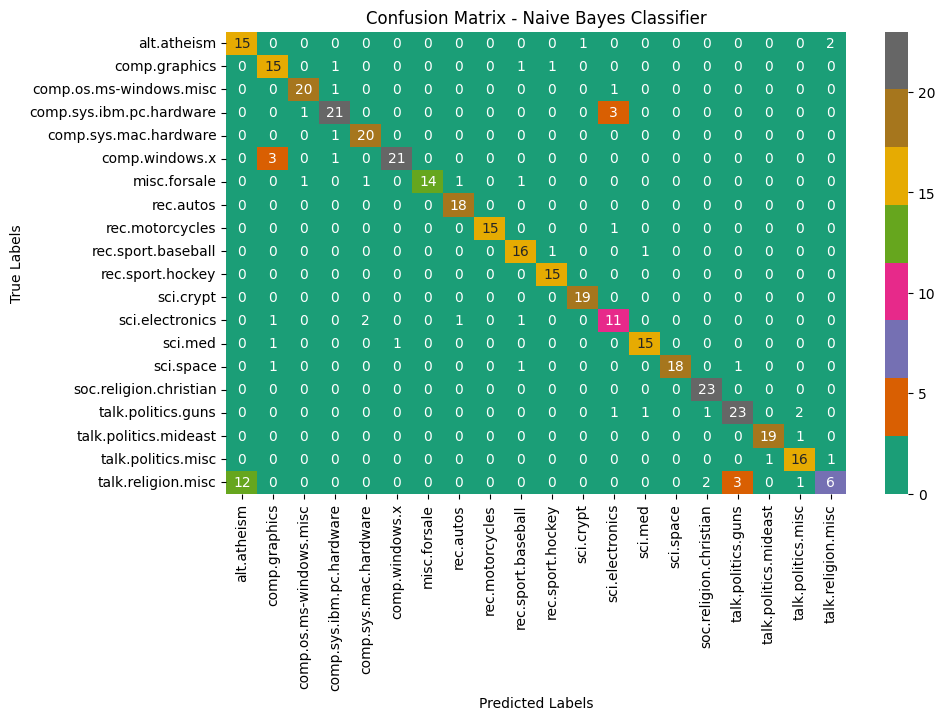

In [18]:
# Confusion Matrix Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Dark2',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [19]:
# 5. Sentiment Analysis

In [20]:
def get_sentiment(text):
    """
    Returns sentiment category based on polarity score:
    - Positive: Polarity > 0
    - Negative: Polarity < 0
    - Neutral : Polarity = 0
    """   
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
# Apply sentiment analysis on original blog text
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [22]:
# Check distribution of sentiments
print("\nSentiment Distribution:\n", df['Sentiment'].value_counts())


Sentiment Distribution:
 Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


In [23]:
# Sentiment distribution by category
print("\nSentiment by Category:\n", df.groupby('Labels')['Sentiment'].value_counts())


Sentiment by Category:
 Labels                    Sentiment
alt.atheism               Positive     77
                          Negative     23
comp.graphics             Positive     76
                          Negative     24
comp.os.ms-windows.misc   Positive     78
                          Negative     22
comp.sys.ibm.pc.hardware  Positive     80
                          Negative     20
comp.sys.mac.hardware     Positive     76
                          Negative     24
comp.windows.x            Positive     73
                          Negative     27
misc.forsale              Positive     84
                          Negative     16
rec.autos                 Positive     83
                          Negative     17
rec.motorcycles           Positive     74
                          Negative     26
rec.sport.baseball        Positive     71
                          Negative     29
rec.sport.hockey          Positive     66
                          Negative     34
sci.crypt      